In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np
from scipy import ndimage

%matplotlib inline

In [ ]:
# read image
person_img = mpimg.imread("images/person.jpg")
jeruk_img = mpimg.imread("images/jeruk_nipis.jpg")

In [ ]:
# image shape 
person_img.shape, jeruk_img.shape 

((1901, 2229, 3), (195, 258, 3))

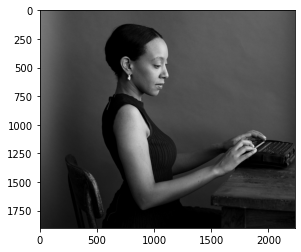

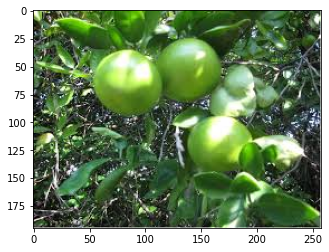

In [ ]:
plt.imshow(person_img)
plt.show()

plt.imshow(jeruk_img)
plt.show()

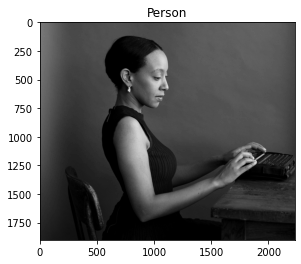

In [ ]:
person_gray =cv2.cvtColor(person_img, cv2.COLOR_RGB2GRAY)
plt.title("Person")
plt.imshow(person_gray, cmap="gray")
plt.show()

In [ ]:
person_gray.shape

(1901, 2229)

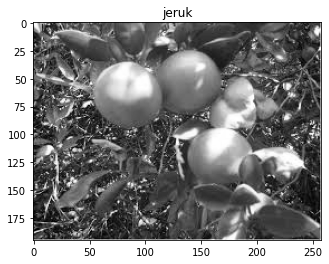

In [ ]:
jeruk_gray =cv2.cvtColor(jeruk_img, cv2.COLOR_RGB2GRAY)
plt.title("jeruk")
plt.imshow(jeruk_gray, cmap="gray")
plt.show()

In [ ]:
jeruk_gray.shape

(195, 258)

In [ ]:
#create custom kernel
# 3x3 array for edge detection
filter_edge = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

filter_sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

In [ ]:
def image_filter(img, filter_matrix):
    filtered_imge = cv2.filter2D(img, -1, filter_matrix)
    print(filtered_imge.shape)
    plt.title("filter_img")
    plt.imshow(filtered_imge, cmap="gray")
    plt.show()

(195, 258)


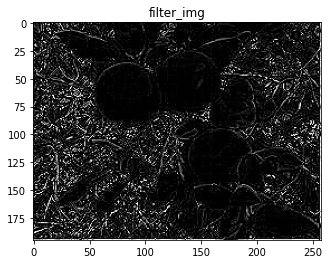

In [ ]:
image_filter(jeruk_gray, filter_edge)

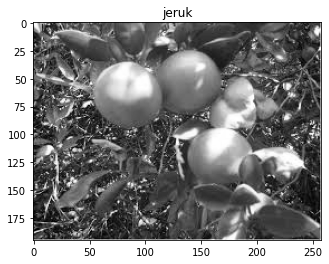

(195, 258)


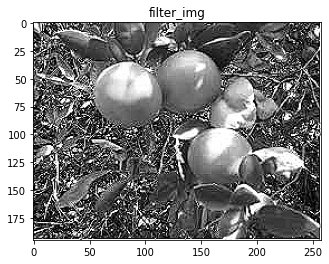

In [ ]:
jeruk_gray = cv2.cvtColor(jeruk_img, cv2.COLOR_RGB2GRAY)
plt.title("jeruk")
plt.imshow(jeruk_gray, cmap="gray")
plt.show()

image_filter(jeruk_gray, filter_sharpen)

# 1. More Filter Using Scikit-Image

In [ ]:
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

In [ ]:
img = io.imread("images/person2.jpg", as_gray=True)
img.shape

(1789, 1118)

In [ ]:
edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

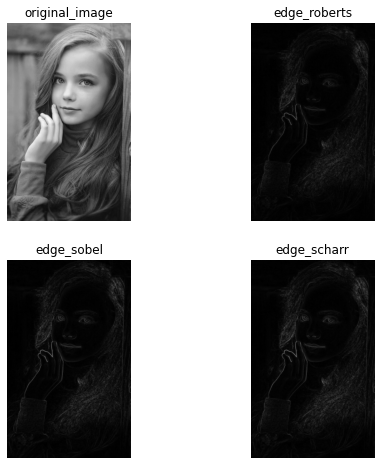

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("original_image")
edge_scharr
ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title("edge_roberts")

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title("edge_sobel")

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title("edge_scharr")

for a in ax:
    a.axis("off")

plt.show()

# 2. Image Segmetation

Reference : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5154238/pdf/kcam-08-05-969641.pdf

In [ ]:
from skimage import io, color, restoration, img_as_float

In [ ]:
import skimage
skimage.__version__

'0.18.1'

(412, 355)


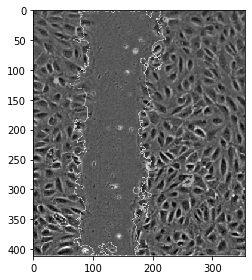

In [ ]:
img = io.imread("images/cell_all.jpeg", as_gray=True)
print(img.shape)
io.imshow(img)

### 2.1 Using Gaussian filter

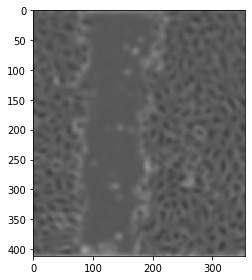

In [ ]:
from skimage.filters import gaussian

img_gaussian = gaussian(img, sigma=4)
io.imshow(img_gaussian)

### 2.2 Using Hysteresis threshold

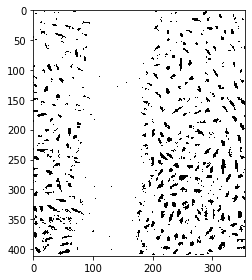

In [ ]:
from skimage import filters
low=0.2
high=0.5
img_hyst = filters.apply_hysteresis_threshold(img, low, high)
io.imshow(img_hyst)

### 2.3 Using Entropy Filter

c:\users\kejepang\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3418: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\kejepang\appdata\local\programs\python\python38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


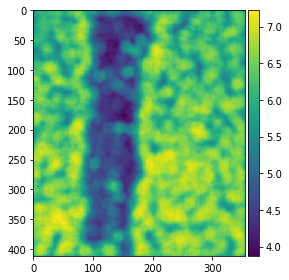

In [ ]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

entr_img = entropy(img, disk(10))
io.imshow(entr_img)

In [ ]:
from skimage.filters import try_all_threshold

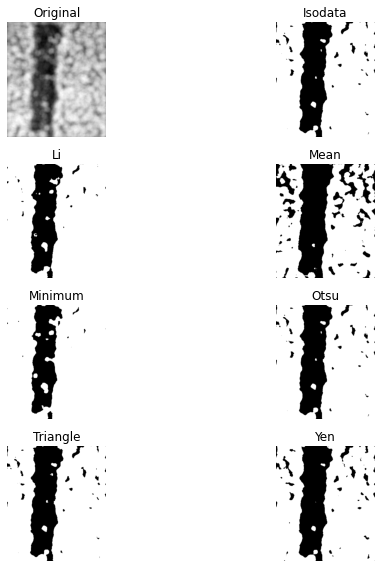

In [ ]:
fig, ax = try_all_threshold(entr_img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
from skimage.filters import threshold_minimum, threshold_otsu

In [ ]:
thresh_min = threshold_minimum(entr_img)
thresh_min

5.24222147133322

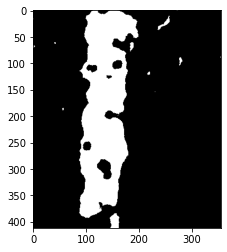

In [ ]:
binary=entr_img<=thresh_min
plt.imshow(binary, cmap=plt.cm.gray)

In [ ]:
thresh_otsu = threshold_otsu(entr_img)
thresh_otsu

5.6214930550482425

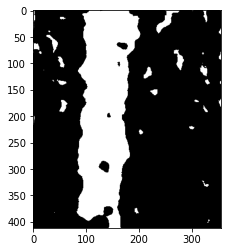

In [ ]:
binary_otsu=entr_img<=thresh_otsu
plt.imshow(binary_otsu, cmap=plt.cm.gray)

In [ ]:
(np.sum(binary==1)*100)/(np.sum(binary==0) + np.sum(binary==1))

18.75905920962669

In [ ]:
(np.sum(binary_otsu==1)*100)/(np.sum(binary_otsu==0) + np.sum(binary_otsu==1))

24.465335703541637

In [ ]:
import glob

time = 0
time_list = []
area_list = []
path = "./images_example/scratch_assay/*.*"
for file in glob.glob(path):
    dict={}
    # read image
    img=io.imread(file)
    # apply entropy filter
    img_entropy= entropy(img, disk(10))
    # define threshold value
    binary=img_entropy<=thresh_min
    # calcaulate scratch area
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr ", "scratch_area=", scratch_area)
    time_list.append(time)
    time +=1
    area_list.append(scratch_area)

time= 0 hr  scratch_area= 111070
time= 1 hr  scratch_area= 106520
time= 2 hr  scratch_area= 105735
time= 3 hr  scratch_area= 102011
time= 4 hr  scratch_area= 101574
time= 5 hr  scratch_area= 93192
time= 6 hr  scratch_area= 91049
time= 7 hr  scratch_area= 90078
time= 8 hr  scratch_area= 83666
time= 9 hr  scratch_area= 82587


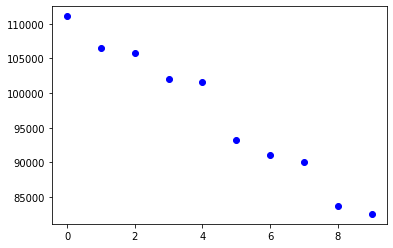

In [ ]:
plt.plot(time_list, area_list, "bo")